<a href="https://colab.research.google.com/github/JunLee1422/CBNU_2023254019_/blob/main/Apprentice%20project/%EC%96%B4%ED%94%84%EB%9E%9C%ED%8B%B0%EC%8A%A4_%EA%B3%BC%EC%A0%9C01_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EC%83%9D%EC%A1%B4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 생존자 수: 342
2. 항구 'S'에서 탑승한 승객 수: 644
3. 남성 승객 수: 577
4. 3등실에 탑승하고 40.000 미만 요금 지불한 승객 수: 471
5. 승객 ID가 674인 승객의 이름: Wilhelms, Mr. Charles
6. 승객들의 평균 나이: 29.69911764705882
7. 생존자와 사망자의 수:
 0    549
1    342
Name: Survived, dtype: int64
8. 남성과 여성 승객 수:
 male      577
female    314
Name: Sex, dtype: int64
9. 각 성별에 따른 생존자와 사망자의 수:
 Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64
10. 각 등급별로 생존한 사람과 사망한 사람의 평균 지불 요금:
 Survived          0          1
Pclass                        
1         64.684007  95.608029
2         19.412328  22.055700
3         13.669364  13.694887


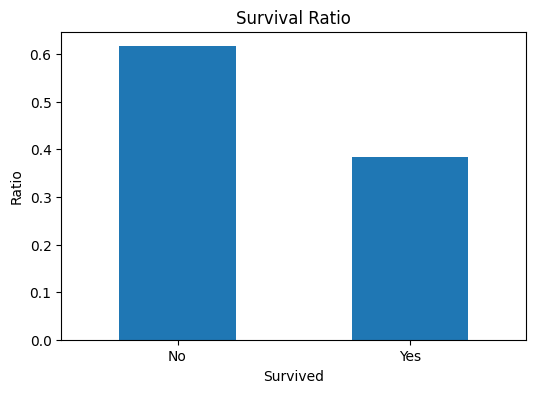

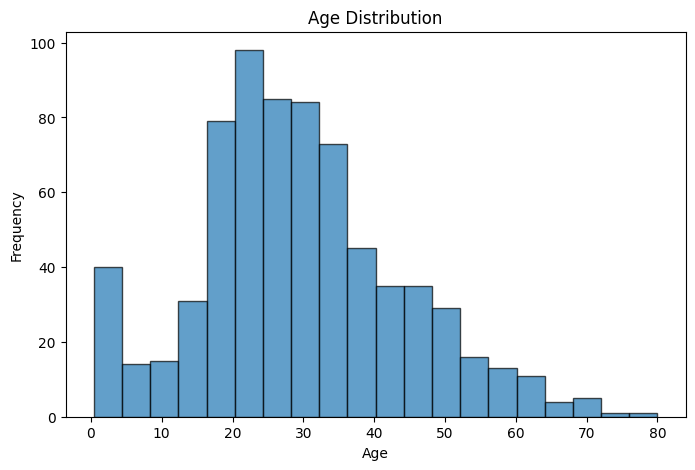

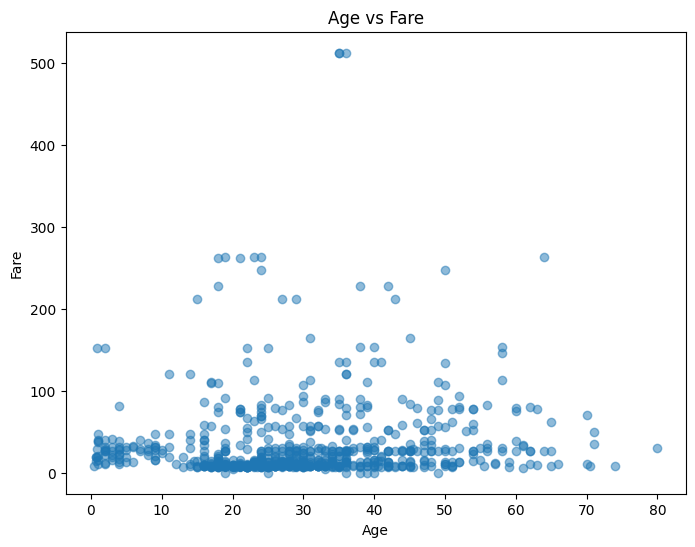

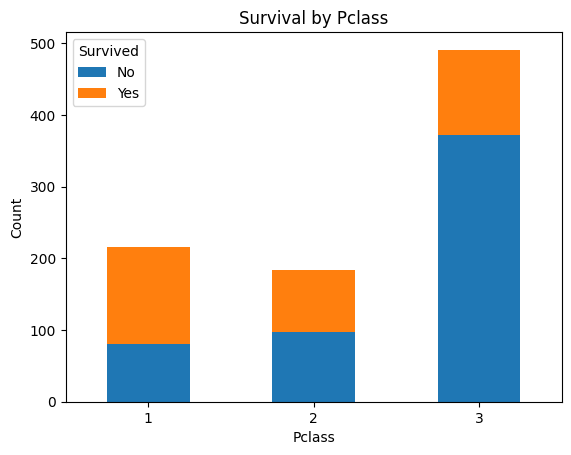

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일을 읽어옵니다.
data = pd.read_csv("titanic.csv")

# I. DataFrame 데이터 탐색
# 1. 생존자 중 몇 명인지 계산하세요.
survived_count = data['Survived'].sum()
print("1. 생존자 수:", survived_count)

# 2. 항구 "S"에서 탑승한 승객 수를 계산하세요.
port_S_count = (data['Embarked'] == 'S').sum()
print("2. 항구 'S'에서 탑승한 승객 수:", port_S_count)

# 3. 남성 승객 수를 계산하세요.
male_count = (data['Sex'] == 'male').sum()
print("3. 남성 승객 수:", male_count)

# 4. 3등실에 탑승하고 지불한 요금이 40.000 미만인 승객 수를 계산하세요.
third_class_low_fare_count = ((data['Pclass'] == 3) & (data['Fare'] < 40.0)).sum()
print("4. 3등실에 탑승하고 40.000 미만 요금 지불한 승객 수:", third_class_low_fare_count)

# 5. 승객 ID가 674인 승객의 이름을 찾아보세요.
passenger_name = data.loc[data['PassengerId'] == 674, 'Name'].values[0]
print("5. 승객 ID가 674인 승객의 이름:", passenger_name)

# 6. 승객들의 평균 나이를 계산하세요.
average_age = data['Age'].mean()
print("6. 승객들의 평균 나이:", average_age)

# 7. 생존자와 사망자의 수를 각각 계산하세요.
survived_counts = data['Survived'].value_counts()
print("7. 생존자와 사망자의 수:\n", survived_counts)

# 8. 남성과 여성 승객 수를 계산하세요.
gender_counts = data['Sex'].value_counts()
print("8. 남성과 여성 승객 수:\n", gender_counts)

# 9. 각 성별에 따른 생존자와 사망자의 수를 계산하세요. [DataFrame.groupby() 함수 이용]
gender_survival_counts = data.groupby('Sex')['Survived'].value_counts()
print("9. 각 성별에 따른 생존자와 사망자의 수:\n", gender_survival_counts)

# 10. 각 등급별로 생존한 사람과 사망한 사람의 평균 지불 요금을 계산하세요. [DataFrame.pivot_table() 함수 이용]
fare_by_pclass = data.pivot_table(index='Pclass', columns='Survived', values='Fare', aggfunc='mean')
print("10. 각 등급별로 생존한 사람과 사망한 사람의 평균 지불 요금:\n", fare_by_pclass)

# II. DataFrame 데이터 시각화

# 1. 탑승자의 생존 여부에 대한 비율을 계산하고, 이 비율을 막대 그래프로 시각화.
survival_ratio = data['Survived'].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
survival_ratio.plot(kind='bar', rot=0)
plt.title("Survival Ratio")
plt.xlabel("Survived")
plt.ylabel("Ratio")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

# 2. 나이 열의 분포를 20개의 구간(bin)으로 나누어 히스토그램으로 시각화
plt.figure(figsize=(8, 5))
plt.hist(data['Age'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 3. 나이와 요금 간의 산점도 시각화
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Fare'], alpha=0.5)
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# 4. 객실 등급(Pclass)별로 생존자와 사망자 수를 막대그래프로 시각화.
pclass_survival_counts = data.groupby('Pclass')['Survived'].value_counts().unstack()
pclass_survival_counts.plot(kind='bar', stacked=True, rot=0)
plt.title("Survival by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(["No", "Yes"], title="Survived")
plt.show()
